In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/IR - 21.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,0.479590,-0.055473,1
117952,1.090346,-0.036776,1
42613,-0.061319,0.245724,1
43567,-0.548219,0.040475,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,-0.201013,-0.113411,1
54412,-0.208323,0.096975,1
50632,-0.115735,-0.066156,1
89251,-0.534005,-0.094920,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
# Random shuffle training data
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
import tensorflow as tf

Using TensorFlow backend.


In [8]:
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
act_func = 'relu'

In [9]:
# Input layer:
autoencoder=Sequential()
# First hidden layer, connected to input vector X. 
autoencoder.add(Dense(32, activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_test.shape[1],)
               )
         )

autoencoder.add(Dense(2, activation=act_func, kernel_initializer='glorot_uniform'))

autoencoder.add(Dense(32, activation=act_func, kernel_initializer='glorot_uniform'))

autoencoder.add(Dense(X_test.shape[1], kernel_initializer='glorot_uniform'))


autoencoder.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [10]:
NUM_EPOCHS=100
BATCH_SIZE=1000
history=autoencoder.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  verbose = 1,
                  shuffle = True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 0s 3us/step - loss: 0.0589 - accuracy: 0.6474 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0037 - accuracy: 0.7293 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0026 - accuracy: 0.9105 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0025 - accuracy: 0.9105 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0025 - accuracy: 0.9105 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0025 - accuracy: 0.9105 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [============================

Epoch 55/100
174463/174463 [==============================] - 0s 2us/step - loss: 7.7430e-04 - accuracy: 0.9754 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 56/100
174463/174463 [==============================] - 0s 2us/step - loss: 7.7551e-04 - accuracy: 0.9752 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 57/100
174463/174463 [==============================] - 0s 2us/step - loss: 7.7307e-04 - accuracy: 0.9756 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 58/100
174463/174463 [==============================] - 0s 2us/step - loss: 7.7556e-04 - accuracy: 0.9751 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 59/100
174463/174463 [==============================] - 0s 2us/step - loss: 7.7615e-04 - accuracy: 0.9747 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 60/100
174463/174463 [==============================] - 0s 2us/step - loss: 7.7703e-04 - accuracy: 0.9749 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 61/100
174463/174463 [==============================] - 0s 2us/step - 

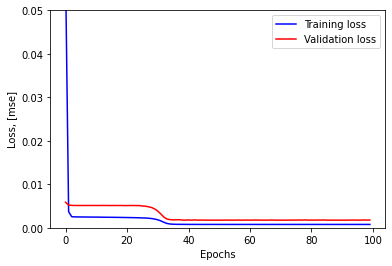

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.05])
plt.show()

In [12]:
pred_train = autoencoder.predict(train)

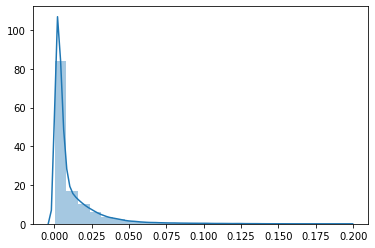

In [13]:
import seaborn as sns

scored_train = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored_train, bins = 25, kde= True);
#g.set(xlim=(0.05,0.10), ylim=(0, 1))
plt.show()

In [14]:
TH = 0.075

scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

scored_train

,Loss_mae,Threshold,Anomaly
0,0.002186,0.075,False
1,0.006109,0.075,False
2,0.004627,0.075,False
3,0.002386,0.075,False
4,0.001340,0.075,False
...,...,...,...
193843,0.020169,0.075,False
193844,0.055096,0.075,False
193845,0.001263,0.075,False
193846,0.034867,0.075,False


In [15]:
scored_train['Loss_mae'].mean()

0.011271935792503397

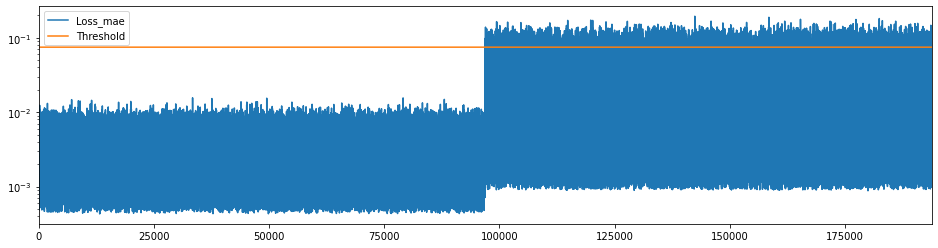

In [16]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])

In [17]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.002186,0.075,False
1,0.006109,0.075,False
2,0.004627,0.075,False
3,0.002386,0.075,False
4,0.001340,0.075,False
...,...,...,...
193843,0.020169,0.075,False
193844,0.055096,0.075,False
193845,0.001263,0.075,False
193846,0.034867,0.075,False


In [18]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96928   0.089449      0.075     True
96951   0.098875      0.075     True
96990   0.139436      0.075     True
97108   0.097346      0.075     True
97137   0.078786      0.075     True
...          ...        ...      ...
193763  0.127537      0.075     True
193765  0.086379      0.075     True
193803  0.081109      0.075     True
193821  0.079240      0.075     True
193833  0.102382      0.075     True

[2784 rows x 3 columns]
(2784, 3)


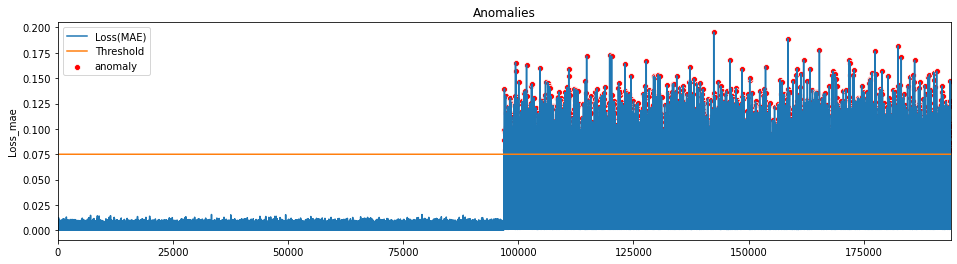

In [19]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.legend();

In [20]:
pred_test = autoencoder.predict(test)

In [21]:
score = autoencoder.evaluate(test,test)
score

48462/48462 [==============================] - 1s 15us/step


[0.0008907115093952751, 0.978746235370636]

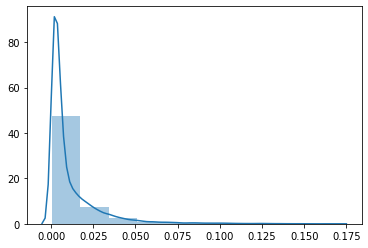

In [22]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
#g.set(xlim=(1,1.5), ylim=(0, 0.5))
plt.show()

In [23]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.001538,0.075,False
1,0.002541,0.075,False
2,0.004626,0.075,False
3,0.007427,0.075,False
4,0.000707,0.075,False
...,...,...,...
48457,0.021257,0.075,False
48458,0.013680,0.075,False
48459,0.014685,0.075,False
48460,0.039210,0.075,False


In [24]:
scored_test['Loss_mae'].mean()

0.011308336521063111

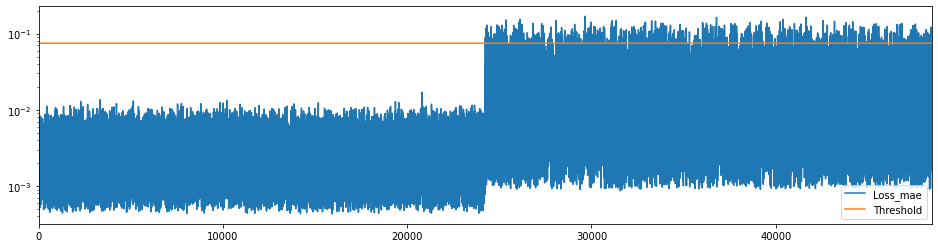

In [25]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])

In [26]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
24241  0.089215      0.075     True
24255  0.087614      0.075     True
24271  0.085187      0.075     True
24273  0.118404      0.075     True
24279  0.083230      0.075     True
...         ...        ...      ...
48238  0.104620      0.075     True
48321  0.098112      0.075     True
48343  0.076096      0.075     True
48422  0.121432      0.075     True
48425  0.094518      0.075     True

[698 rows x 3 columns]
(698, 3)


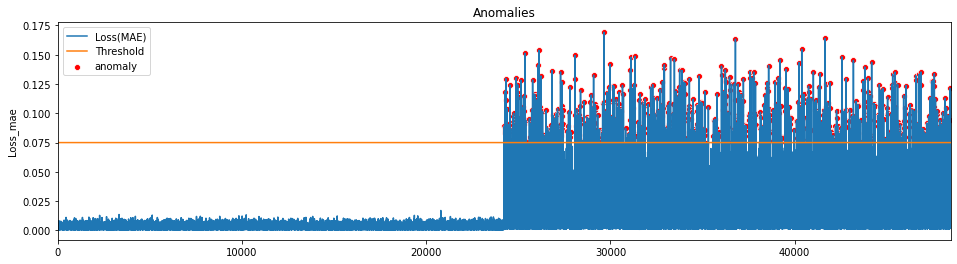

In [27]:
f, (ax2) = plt.subplots(figsize=(16, 4))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.legend();

In [28]:
print(score[1])

0.978746235370636


In [29]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 97.87%


In [30]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 698
